In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

music_data = pd.read_csv("Resources/top10s.csv", encoding = "ISO-8859-1")

In [47]:
music_df = pd.DataFrame(music_data)
music_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [48]:
columns = {"title": "Title", "artist": "Artist", "top genre": "Top Genre", "year": "Year", "bpm": "Beats per Minute (BPM)", 
           "nrgy": "Energy", "dnce": "Danceability", "dB": "Loudness (dB)", "live": "Liveness", "val": "Valence", 
           "dur": "Duration (sec)", "acous": "Acousticness", "spch": "Speechiness", "pop": "Popularity"}

clean_music_df = music_df.rename(columns = columns)
clean_music_df.head()

,Unnamed: 0,Title,Artist,Top Genre,Year,Beats per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [49]:
music_subset_data_df=pd.DataFrame(clean_music_df,columns=['Title','Artist','Year','Energy',
                                                          'Danceability','Valence','Popularity'])
music_subset_data_df.head()

,Title,Artist,Year,Energy,Danceability,Valence,Popularity
0,"Hey, Soul Sister",Train,2010,89,67,80,83
1,Love The Way You Lie,Eminem,2010,93,75,64,82
2,TiK ToK,Kesha,2010,84,76,71,80
3,Bad Romance,Lady Gaga,2010,92,70,71,79
4,Just the Way You Are,Bruno Mars,2010,84,64,43,78


In [50]:
avg_music_data_by_year_df=music_subset_data_df.groupby('Year').mean()
avg_music_data_by_year_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,77.901961,64.529412,57.000000,64.254902
2011,74.886792,63.641509,53.698113,61.867925
2012,75.485714,65.714286,64.171429,67.771429
2013,73.873239,62.042254,53.183099,63.985915
2014,67.775862,62.534483,52.086207,62.706897
2015,70.336842,63.663158,52.526316,64.568421
2016,67.237500,63.325000,45.150000,64.162500
2017,69.169231,65.369231,52.276923,69.015385
2018,65.468750,67.203125,48.765625,72.437500


In [51]:
music_genre_group = clean_music_df.groupby("Top Genre")
genre_count = music_genre_group["Top Genre"].count()
result = genre_count.rename('Count').reset_index()
genre_count_df = pd.DataFrame(result)
genre_count_df.head()

,Top Genre,Count
0,acoustic pop,2
1,alaska indie,1
2,alternative r&b,1
3,art pop,8
4,atl hip hop,5


([<matplotlib.patches.Wedge at 0x2a8aa3466d8>,
 [Text(16.749090702496286, 0.17452976695253564, 'acoustic pop'),
  Text(16.74431716055078, 0.43628296653056226, 'alaska indie'),
  Text(16.738862239340666, 0.610729835831929, 'alternative r&b'),
  Text(16.69183812416295, 1.394646921891095, 'art pop'),
  Text(16.55918187787627, 2.5211099808247566, 'atl hip hop'),
  Text(16.3875921607573, 3.4654470379282745, 'australian dance'),
  Text(16.250340045528844, 4.060658617106524, 'australian hip hop'),
  Text(16.115487055981934, 4.566571684368777, 'australian pop'),
  Text(15.553109641911261, 6.21798041703952, 'barbadian pop'),
  Text(14.942146395813074, 7.569330293103236, 'baroque pop'),
  Text(14.781170310923496, 7.879054780839754, 'belgian edm'),
  Text(14.260020630730951, 8.787167439575034, 'big room'),
  Text(12.997951674900738, 10.564835647417576, 'boy band'),
  Text(11.452161234391102, 12.223358910770378, 'british soul'),
  Text(10.598658894533417, 12.970386641782415, 'brostep'),
  Text(9.8

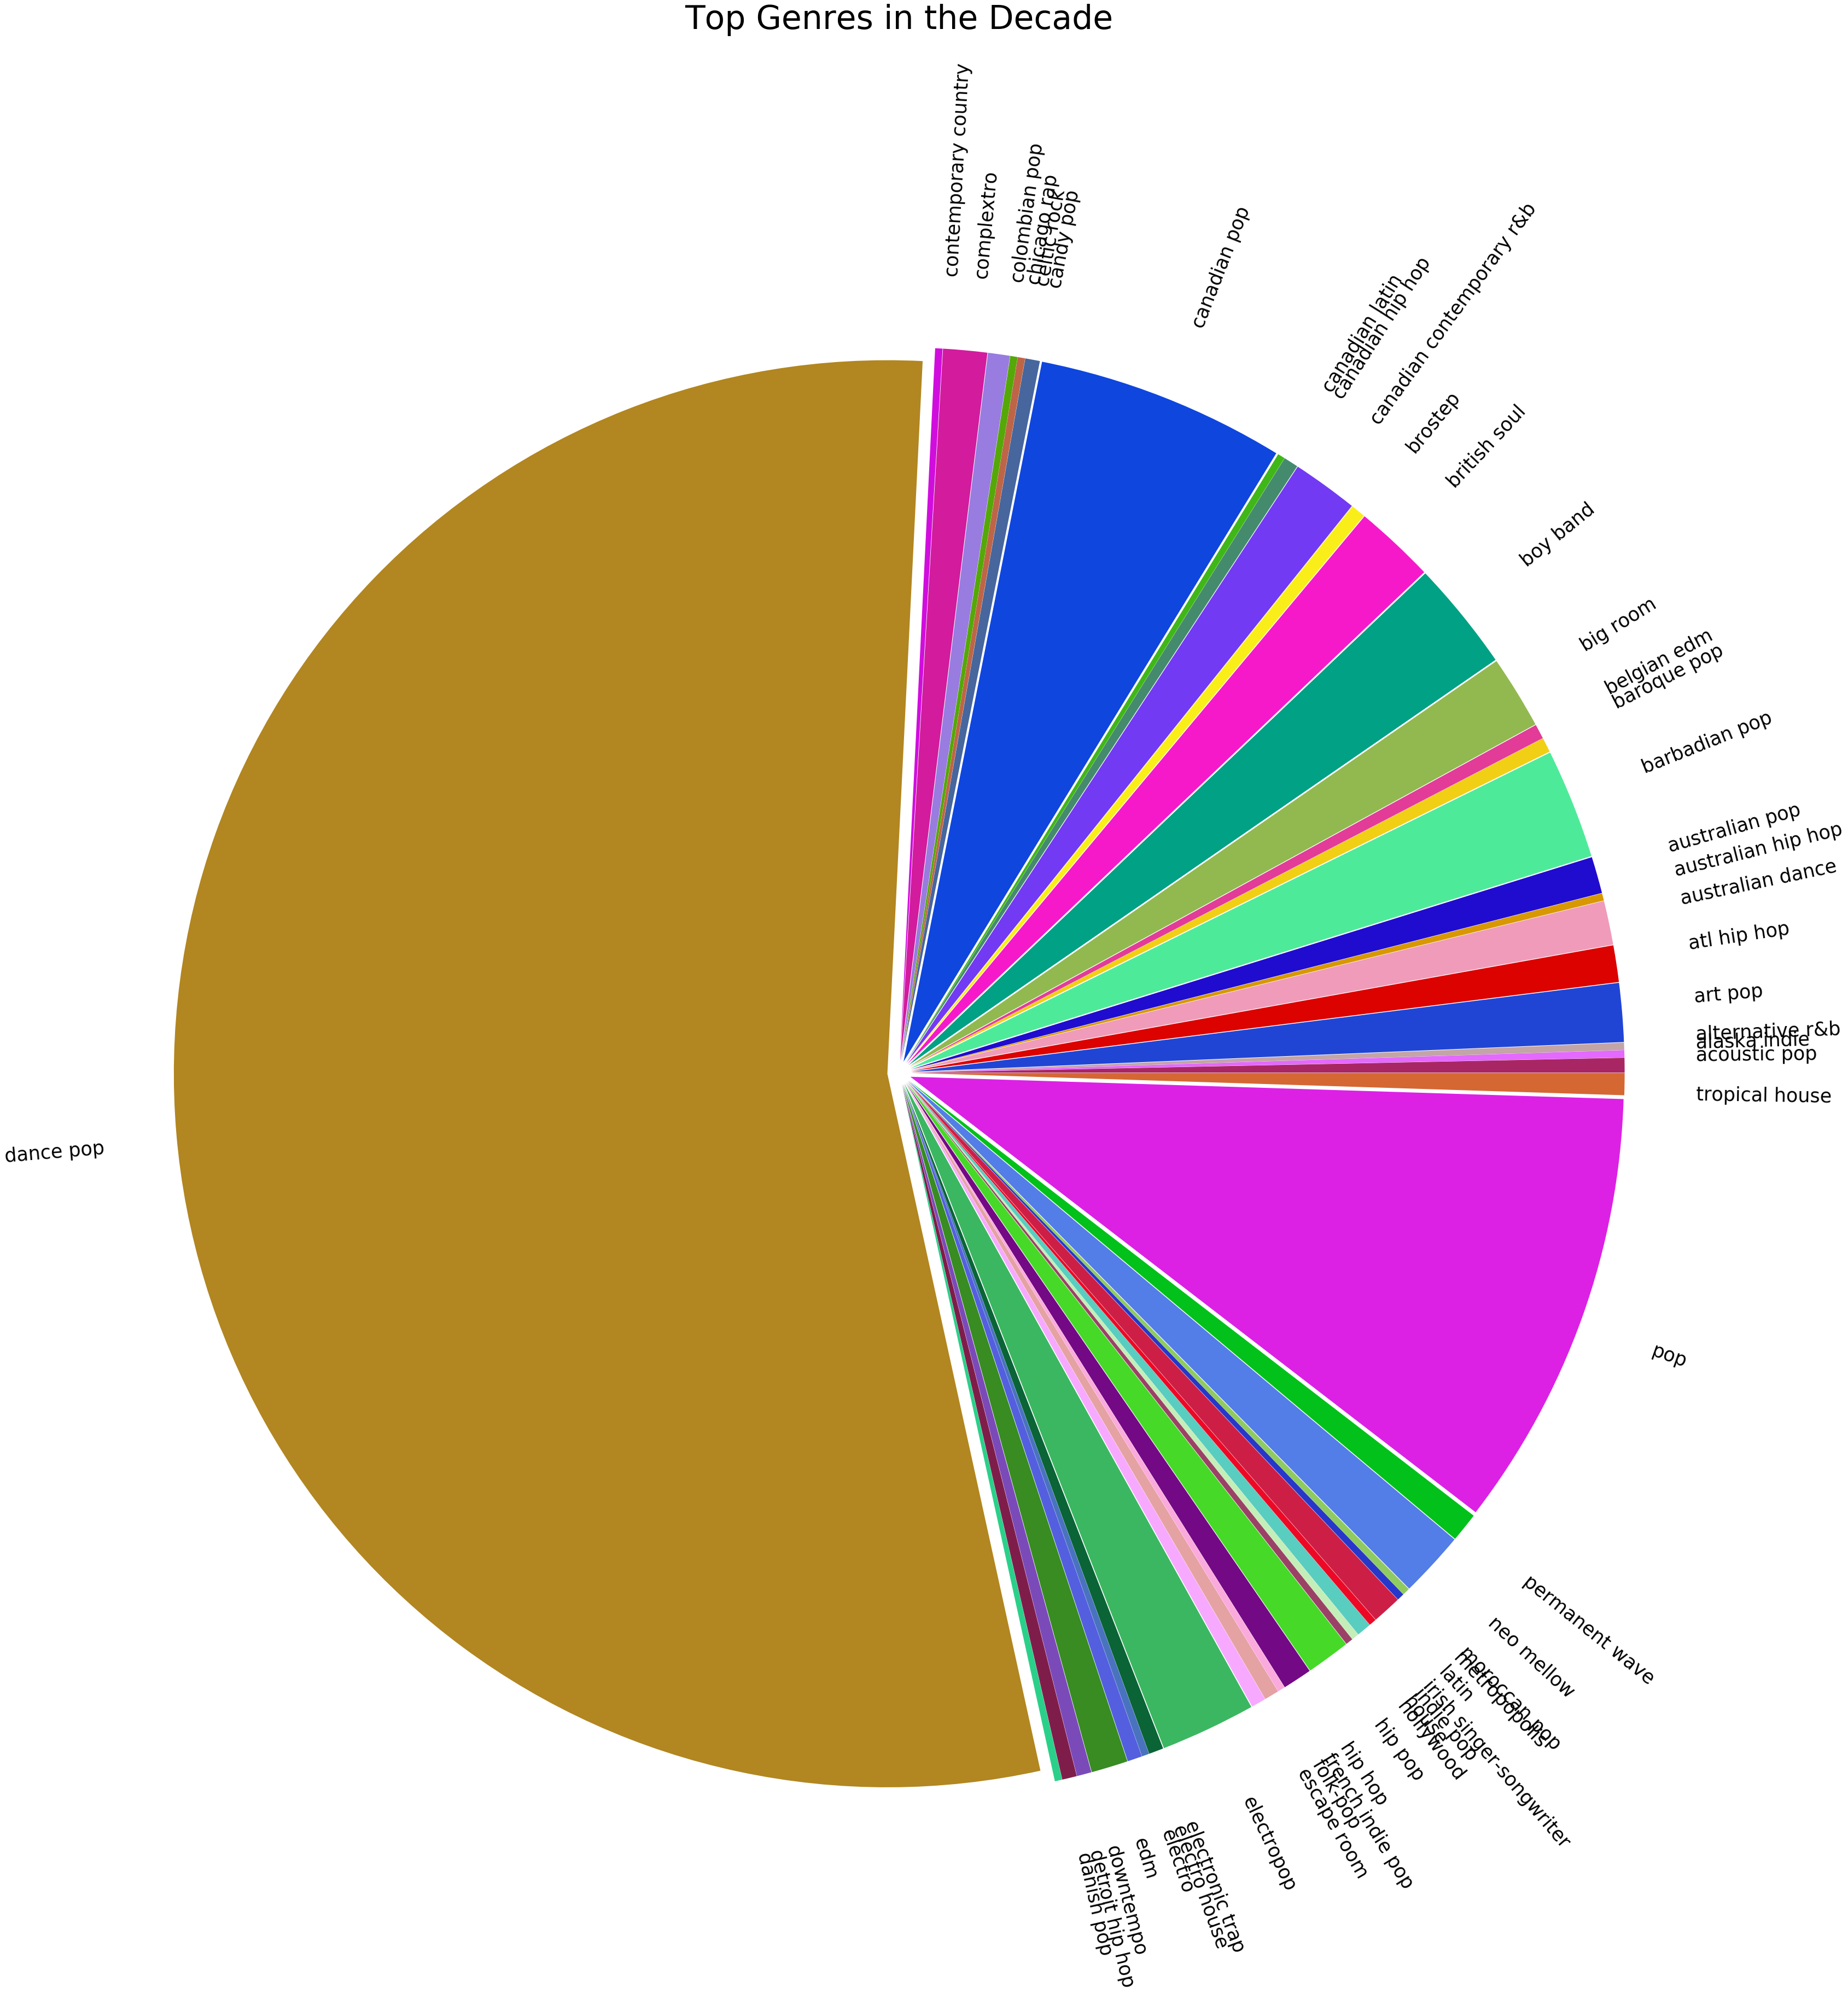

In [52]:
sort_genre_df = genre_count_df.sort_values('Count', ascending=False)
labels = genre_count_df["Top Genre"]
sizes = genre_count_df["Count"]
explode = []
colors = []
index_genre_df = sort_genre_df.reset_index()
index_genre_df = pd.DataFrame(index_genre_df, columns = ["Top Genre", "Count"])
i=0
for i in (index_genre_df.index):
    explode.append(0.25)
num_colors = len(index_genre_df)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]

plt.title("Top Genres in the Decade", y=9.25, fontsize = 60)
plt.pie(x=sizes, explode = explode, labels = labels, colors = colors, radius = 15.0, 
        textprops={'fontsize': 35}, rotatelabels = True)
# size = (1000.0,1000.0)
# dpi = 50
# fig=plt.figure()
# fig.set_figheight(25.0)
# fig.set_figwidth(25.0)
# fig.savefig("Images/Top_Genres.png", dpi=dpi)

# plt.show()
#Image too large to save as png within Jupyter.
#Saved as Top_Genres.png in Images folder.

In [53]:
clean_music_df['Top Genre'] = clean_music_df['Top Genre'].replace(
    {"acoustic pop":"pop","art pop":"pop","australian pop":"pop","barbadian pop":"pop","baroque pop":"pop",
     "canadian pop":"pop","candy pop":"pop","colombian pop":"pop","dance pop":"pop","danish pop":"pop","electropop":"pop",
     "folk-pop":"pop","french indie pop":"pop","hip pop":"pop","indie pop":"pop","moroccan pop":"pop",'alaska indie': "other", 
     'alternative r&b': 'r&b', 'atl hip hop': 'hip hop','australian dance': 'other', 'australian hip hop': 'other', 
     'belgian edm': 'other','big room': 'other', 'boy band': 'other', 'british soul': 'other', 'brostep': 'other',
     'canadian contemporary r&b': 'r&b', 'canadian hip hop': 'hip hop', 'canadian latin': 'other','celtic rock': 'other', 
     'chicago rap': 'other', 'complextro': 'other', 'contemporary country': 'other','detroit hip hop': 'hip hop', 
     'downtempo': 'other', 'edm': 'other', 'electro': 'other', 'electro house': 'other','electronic trap': 'other', 
     'escape room': 'other', 'hip hop': 'hip hop', 'hollywood': 'other', 'house': 'other','irish singer-songwriter': 'other', 
     'latin': 'other', 'metropopolis': 'other', 'neo mellow': 'other','permanent wave': 'other', 'tropical house': 'other'})
pop_music_df = clean_music_df

pop_genre_group = pop_music_df.groupby("Top Genre")
pop_genre_count = pop_genre_group["Top Genre"].count()
pop_result = pop_genre_count.rename('Count').reset_index()
pop_genre_count_df = pd.DataFrame(pop_result)
pop_genre_count_df


,Top Genre,Count
0,hip hop,13
1,other,96
2,pop,484
3,r&b,10


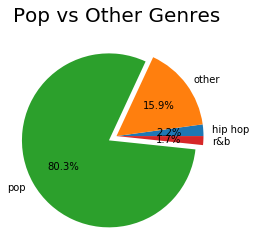

In [54]:
labels = ['hip hop', 'other', 'pop', 'r&b']
sizes = [13,96,484,10]
explode = [0,0,.1,0]
plt.title ("Pop vs Other Genres", y=1.00, fontsize = 20)

plt.pie(x=sizes, labels = labels, explode = explode, autopct='%1.1f%%')
plt.savefig("Images/Pop_vs_Others.png", figsize = (7.5,6.0))

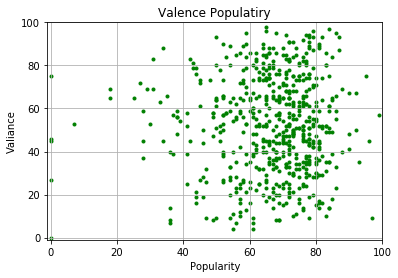

In [55]:
#Valience Popularity Plot

plt.ylim(-1, 100)
plt.xlim(-1,100)
plt.title('Valence Populatiry')
plt.xlabel('Popularity')
plt.ylabel('Valiance')
plt.grid(axis='both')

plt.scatter(clean_music_df['Popularity'],clean_music_df['Valence'], marker='.', c='g')
plt.savefig('Images/Valence.png')

plt.show()

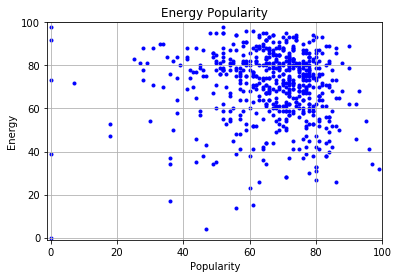

In [56]:
#Energy Popularity Plot

plt.ylim(-1, 100)
plt.xlim(-1,100)
plt.title('Energy Popularity')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.grid(axis='both')

plt.scatter(clean_music_df['Popularity'],clean_music_df['Energy'], marker='.',c='b')
plt.savefig('Images/Energy.png')
plt.show()

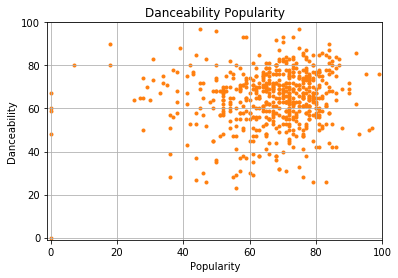

In [57]:
#Danceability Popularity Plot

plt.ylim(-1, 100)
plt.xlim(-1,100)
plt.title('Danceability Popularity')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.grid(axis='both')

plt.scatter(clean_music_df['Popularity'],clean_music_df['Danceability'], marker='.',c='tab:orange')
plt.savefig('Images/Danceability.png')
plt.show()

In [58]:
#Only focused on the colums that are important: Made a DF
music_subset_data_df=pd.DataFrame(clean_music_df,columns=['Title','Artist','Year','Energy',
                                                          'Danceability','Valence','Popularity','Top Genre'])
music_subset_data_df

,Title,Artist,Year,Energy,Danceability,Valence,Popularity,Top Genre
0,"Hey, Soul Sister",Train,2010,89,67,80,83,other
1,Love The Way You Lie,Eminem,2010,93,75,64,82,hip hop
2,TiK ToK,Kesha,2010,84,76,71,80,pop
3,Bad Romance,Lady Gaga,2010,92,70,71,79,pop
4,Just the Way You Are,Bruno Mars,2010,84,64,43,78,pop
...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,2019,66,61,16,75,pop
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,2019,79,75,61,75,pop
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,2019,76,53,65,70,pop
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,2019,79,60,24,69,pop


In [59]:
#Changed all subgenres of 'pop' to pop
music_subset_data_df['Top Genre'] = music_subset_data_df['Top Genre'].replace(
    {"acoustic pop":"pop",
"art pop":"pop",
"australian pop":"pop","barbadian pop":"pop","baroque pop":"pop",
     "canadian pop":"pop","candy pop":"pop","colombian pop":"pop",
     "dance pop":"pop","danish pop":"pop","electropop":"pop",
     "folk-pop":"pop","french indie pop":"pop","hip pop":"pop",
     "indie pop":"pop","moroccan pop":"pop"})


In [60]:
#Averages of the DataFrame
avg_music_data_by_year_df=music_subset_data_df.groupby('Year').mean()
avg_music_data_by_year_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,77.901961,64.529412,57.000000,64.254902
2011,74.886792,63.641509,53.698113,61.867925
2012,75.485714,65.714286,64.171429,67.771429
2013,73.873239,62.042254,53.183099,63.985915
2014,67.775862,62.534483,52.086207,62.706897
2015,70.336842,63.663158,52.526316,64.568421
2016,67.237500,63.325000,45.150000,64.162500
2017,69.169231,65.369231,52.276923,69.015385
2018,65.468750,67.203125,48.765625,72.437500


In [61]:
#Indexed by genre and defined pop variables
genre_indexed = music_subset_data_df.set_index("Top Genre")


pop_valence = genre_indexed.loc["pop", "Valence"]

pop_energy = genre_indexed.loc["pop", "Energy"]

pop_danceability = genre_indexed.loc["pop", "Danceability"]

pop_popularity = genre_indexed.loc["pop", "Popularity"]


In [62]:
#Made a DF with no pop songs

no_pop = genre_indexed.drop('pop')
no_pop_df = pd.DataFrame(no_pop)


no_pop_df_grouped = no_pop_df.groupby('Year')
no_pop_means = no_pop_df_grouped.mean()
no_pop_means_df = pd.DataFrame(no_pop_means)
no_pop_means_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,87.833333,66.333333,57.500000,56.333333
2011,66.000000,59.250000,37.000000,69.500000
2012,72.750000,62.750000,50.250000,76.250000
2013,74.562500,59.812500,49.500000,66.000000
2014,59.133333,53.933333,38.666667,62.600000
2015,67.888889,56.888889,36.666667,67.944444
2016,58.176471,54.941176,38.235294,57.882353
2017,69.100000,59.850000,45.650000,68.100000
2018,65.222222,63.444444,43.444444,72.666667


In [63]:
#Defined Variables: 
pval_mean = pop_valence.mean()
pnrg_mean = pop_energy.mean()
pdance_mean = pop_danceability.mean()


all_valence = avg_music_data_by_year_df["Valence"]
all_nrg = avg_music_data_by_year_df["Energy"]
all_dance = avg_music_data_by_year_df["Danceability"]


no_pop_val = no_pop_means_df["Valence"]
no_pop_nrg = no_pop_means_df["Energy"]
no_pop_dance = no_pop_means_df["Danceability"]

years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

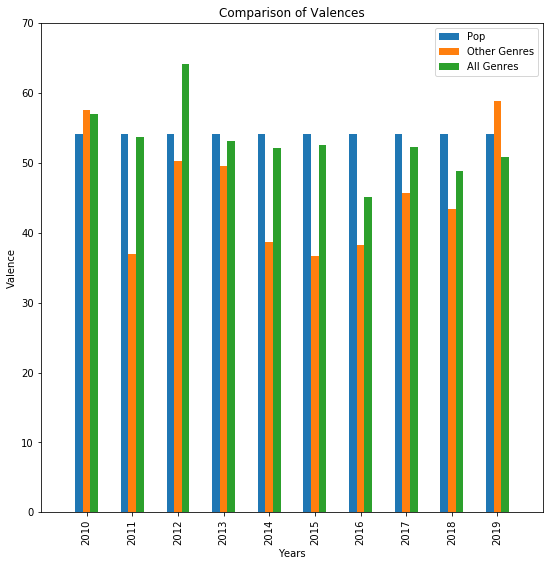

In [64]:
avg_valence_df = pd.DataFrame({"Pop": pval_mean,"Other Genres":no_pop_val, "All Genres":all_valence}, index=years)
ax=avg_valence_df.plot.bar(width =.5,figsize=(9,9))
ax.set_ylabel('Valence')
ax.set_xlabel('Years')
ax.set_title('Comparison of Valences')

plt.ylim(0,70)
plt.xlim(-1,10)
plt.savefig("Images/ValenceCompare.png")

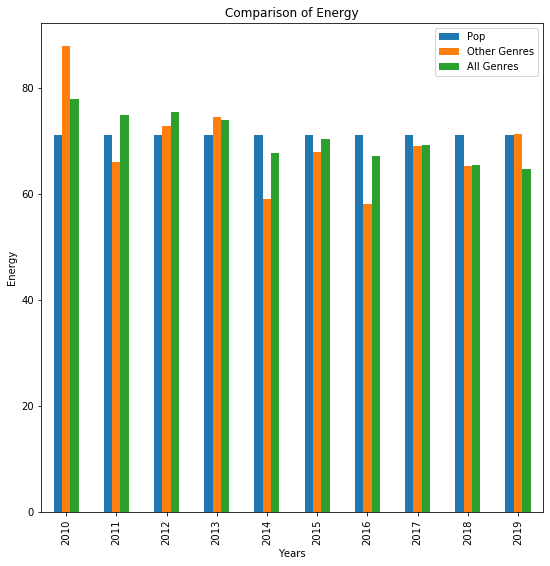

In [65]:
avg_energy_df = pd.DataFrame({"Pop": pnrg_mean,"Other Genres":no_pop_nrg, "All Genres":all_nrg}, index=years)
ax=avg_energy_df.plot.bar(width =.5,figsize=(9,9))
ax.set_ylabel('Energy')
ax.set_xlabel('Years')
ax.set_title('Comparison of Energy')
plt.savefig("EnergyCompare.png")

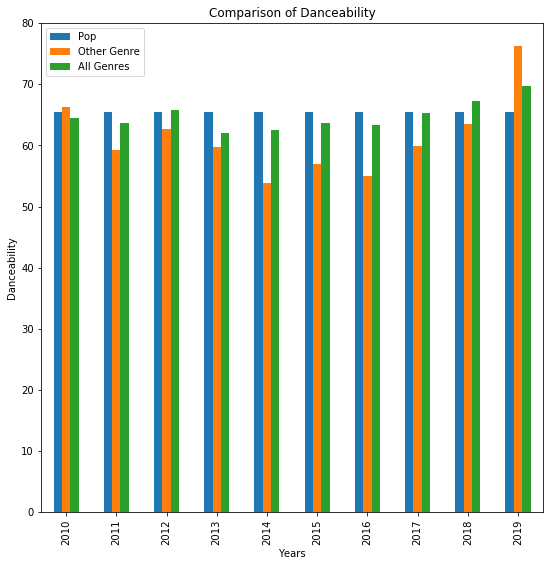

In [66]:
avg_dance_df = pd.DataFrame({"Pop": pdance_mean, "Other Genre":no_pop_dance,
                             "All Genres":all_dance}, index=years)
ax=avg_dance_df.plot.bar(width =.5,figsize=(9,9))
ax.set_ylabel('Danceability')
ax.set_xlabel('Years')
ax.set_title('Comparison of Danceability')
plt.savefig("Images/DanceCompare.png")

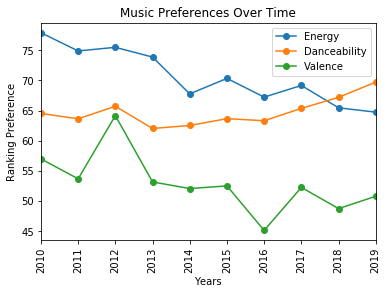

In [67]:
new_df=pd.DataFrame(avg_music_data_by_year_df,columns=['Energy','Danceability','Valence'])
ax=new_df.plot(marker='o',title='Music Preferences Over Time', rot=90)
ax.set_ylabel("Ranking Preference")
ax.set_xlabel("Years")
ax.figure.savefig('Images/PrefsOverTime.png')